
# CNN and SVM model simplified 
Extension of "model_and_features_eval" but a version that is easier to run for multiple experiments.  

### Import stuff

In [1]:
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from functions import *
from possible_data_to_extract import *
from constants import *


# Things to choose: 

In [2]:
###########################################
# Seed number 
seed_number = 42
np.random.seed(seed_number) 

# DEFINE FEATURE GROUPS AND CORRESPONDING NAMES
features_to_plot_names = articulation_all_features + phonation_all_features + prosody_all_features, articulation_all_features, phonation_all_features, prosody_all_features, SoAf_all_mean
names = ["all","articulation_all_features", "phonation_all_features", "prosody_all_features", "SoAf_all_mean"]

# Utterances 
hc_paths = hc_paths_vowels + hc_paths_mod_vowels
pd_paths = pd_paths_vowels + pd_paths_mod_vowels

data_types = ["/A"] # Example: ["/A", "viaje"]  

# SVM parameters --> CHosen based on grid search from model_and_feature_eval
kernel_best ='rbf' 
C_best = 10
gamma_best = 0.001

###########################################

# Extracting data: 

In [3]:
choosen_features = {}
choosen_features["Articulation"] =  articulation_all_features
choosen_features["Phonation"] =  phonation_all_features
choosen_features["Prosody"] =  prosody_all_features

choosen_features["Articulation"].append('id') 


base_path = "PC-GITA-static-features" 
hc_paths = extend_paths(hc_paths, base_path)
pd_paths = extend_paths(pd_paths, base_path)

hc_paths = find_certain_paths_from_all_paths(hc_paths, data_types)
pd_paths = find_certain_paths_from_all_paths(pd_paths, data_types)

features = {}
features["HC"] = get_features(hc_paths, choosen_features)
features["PD"] = get_features(pd_paths, choosen_features)


metadata_path = os.path.join(personal_path_to_PC_GITA,'PCGITA_metadata.xlsx')
metadata = pd.read_excel(metadata_path)

metadata_columns = ["SEX", "AGE", "UPDRS", "UPDRS-speech", "H/Y", "time after diagnosis"]

features["HC"] = add_metadata_columns(features["HC"], metadata, metadata_columns)
features["PD"] = add_metadata_columns(features["PD"], metadata, metadata_columns)

metadata_columns.append("id") 

features_male = {}
features_female =  {}

for key in features.keys(): 
    features_male[key] = features[key][features[key]['SEX'] == 'M']
    features_female[key] = features[key][features[key]['SEX'] == 'F']

# SVM - Model based on best result from the grid search 

---------------------------------------------------------------
FEATURE:  all
Features we are using: 
['avg BBEon_1', 'avg BBEon_2', 'avg BBEon_3', 'avg BBEon_4', 'avg BBEon_5', 'avg BBEon_6', 'avg BBEon_7', 'avg BBEon_8', 'avg BBEon_9', 'avg BBEon_10', 'avg BBEon_11', 'avg BBEon_12', 'avg BBEon_13', 'avg BBEon_14', 'avg BBEon_15', 'avg BBEon_16', 'avg BBEon_17', 'avg BBEon_18', 'avg BBEon_19', 'avg BBEon_20', 'avg BBEon_21', 'avg BBEon_22', 'avg MFCCon_1', 'avg MFCCon_2', 'avg MFCCon_3', 'avg MFCCon_4', 'avg MFCCon_5', 'avg MFCCon_6', 'avg MFCCon_7', 'avg MFCCon_8', 'avg MFCCon_9', 'avg MFCCon_10', 'avg MFCCon_11', 'avg MFCCon_12', 'avg DMFCCon_1', 'avg DMFCCon_2', 'avg DMFCCon_3', 'avg DMFCCon_4', 'avg DMFCCon_5', 'avg DMFCCon_6', 'avg DMFCCon_7', 'avg DMFCCon_8', 'avg DMFCCon_9', 'avg DMFCCon_10', 'avg DMFCCon_11', 'avg DMFCCon_12', 'avg DDMFCCon_1', 'avg DDMFCCon_2', 'avg DDMFCCon_3', 'avg DDMFCCon_4', 'avg DDMFCCon_5', 'avg DDMFCCon_6', 'avg DDMFCCon_7', 'avg DDMFCCon_8', 'avg DDM

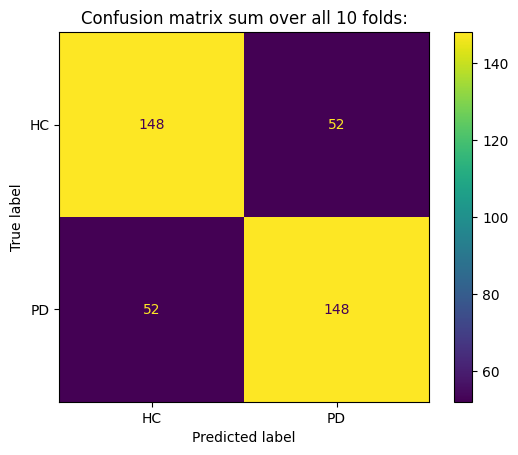

---------------------------------------------------------------
FEATURE:  articulation_all_features
Features we are using: 
['avg BBEon_1', 'avg BBEon_2', 'avg BBEon_3', 'avg BBEon_4', 'avg BBEon_5', 'avg BBEon_6', 'avg BBEon_7', 'avg BBEon_8', 'avg BBEon_9', 'avg BBEon_10', 'avg BBEon_11', 'avg BBEon_12', 'avg BBEon_13', 'avg BBEon_14', 'avg BBEon_15', 'avg BBEon_16', 'avg BBEon_17', 'avg BBEon_18', 'avg BBEon_19', 'avg BBEon_20', 'avg BBEon_21', 'avg BBEon_22', 'avg MFCCon_1', 'avg MFCCon_2', 'avg MFCCon_3', 'avg MFCCon_4', 'avg MFCCon_5', 'avg MFCCon_6', 'avg MFCCon_7', 'avg MFCCon_8', 'avg MFCCon_9', 'avg MFCCon_10', 'avg MFCCon_11', 'avg MFCCon_12', 'avg DMFCCon_1', 'avg DMFCCon_2', 'avg DMFCCon_3', 'avg DMFCCon_4', 'avg DMFCCon_5', 'avg DMFCCon_6', 'avg DMFCCon_7', 'avg DMFCCon_8', 'avg DMFCCon_9', 'avg DMFCCon_10', 'avg DMFCCon_11', 'avg DMFCCon_12', 'avg DDMFCCon_1', 'avg DDMFCCon_2', 'avg DDMFCCon_3', 'avg DDMFCCon_4', 'avg DDMFCCon_5', 'avg DDMFCCon_6', 'avg DDMFCCon_7', 'avg

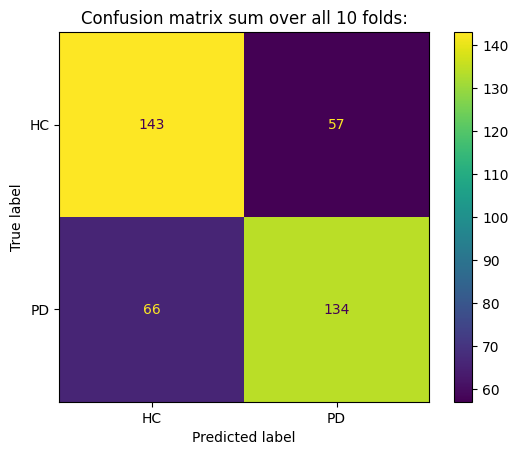

---------------------------------------------------------------
FEATURE:  phonation_all_features
Features we are using: 
['avg DF0', 'avg DDF0', 'avg Jitter', 'avg Shimmer', 'avg apq', 'avg ppq', 'avg logE', 'std DF0', 'std DDF0', 'std Jitter', 'std Shimmer', 'std apq', 'std ppq', 'std logE', 'skewness DF0', 'skewness DDF0', 'skewness Jitter', 'skewness Shimmer', 'skewness apq', 'skewness ppq', 'skewness logE', 'kurtosis DF0', 'kurtosis DDF0', 'kurtosis Jitter', 'kurtosis Shimmer', 'kurtosis apq', 'kurtosis ppq', 'kurtosis logE']
Len of (data, features):  (400, 28)
 
 --------------------------------------------  
Result from model using the best result from grid searchs
 
Training Accuracy: 69.17%
Test Accuracy: 63.75%
Sensitivity (Recall of PD): 51.25%
Specificity (Recall of HC): 76.25%
 
 --------------------------------------------  
Results over all 10 folds:
 
Accuracy over all 10 folds: [57.5, 60.0, 65.0, 67.5, 77.5, 70.0, 52.5, 72.5, 67.5, 75.0]
Average Accuracy: 66.5%
The accu

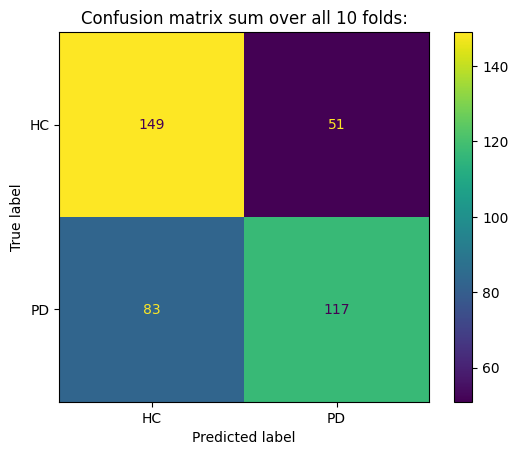

---------------------------------------------------------------
FEATURE:  prosody_all_features
Features we are using: 
['F0avg', 'F0std', 'F0max', 'F0min', 'F0skew', 'F0kurt', 'F0tiltavg', 'F0mseavg', 'F0tiltstd', 'F0msestd', 'F0tiltmax', 'F0msemax', 'F0tiltmin', 'F0msemin', 'F0tiltskw', 'F0mseskw', 'F0tiltku', 'F0mseku', '1F0mean', '1F0std', '1F0max', '1F0min', '1F0skw', '1F0ku', 'lastF0avg', 'lastF0std', 'lastF0max', 'lastF0min', 'lastF0skw', 'lastF0ku', 'avgEvoiced', 'stdEvoiced', 'skwEvoiced', 'kurtosisEvoiced', 'avgtiltEvoiced', 'stdtiltEvoiced', 'skwtiltEvoiced', 'kurtosistiltEvoiced', 'avgmseEvoiced', 'stdmseEvoiced', 'skwmseEvoiced', 'kurtosismseEvoiced', 'avg1Evoiced', 'std1Evoiced', 'max1Evoiced', 'min1Evoiced', 'skw1Evoiced', 'kurtosis1Evoiced', 'avglastEvoiced', 'stdlastEvoiced', 'maxlastEvoiced', 'minlastEvoiced', 'skwlastEvoiced', 'kurtosislastEvoiced', 'avgEunvoiced', 'stdEunvoiced', 'skwEunvoiced', 'kurtosisEunvoiced', 'avgtiltEunvoiced', 'stdtiltEunvoiced', 'skwtiltEun

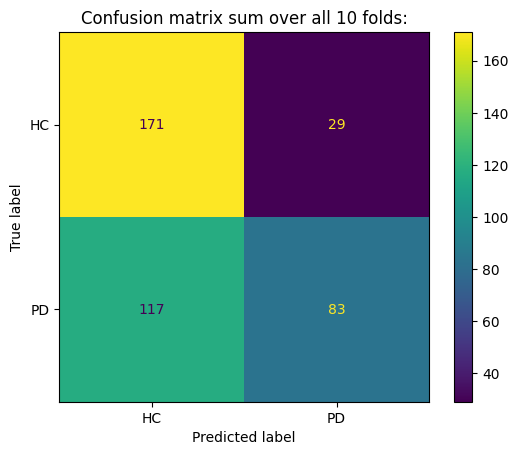

---------------------------------------------------------------
FEATURE:  SoAf_all_mean
Features we are using: 
['avg BBEon_1', 'avg BBEon_2', 'avg BBEon_3', 'avg BBEon_4', 'avg BBEon_5', 'avg BBEon_6', 'avg BBEon_7', 'avg BBEon_8', 'avg BBEon_9', 'avg BBEon_10', 'avg BBEon_11', 'avg BBEon_12', 'avg BBEon_13', 'avg BBEon_14', 'avg BBEon_15', 'avg BBEon_16', 'avg BBEon_17', 'avg BBEon_18', 'avg BBEon_19', 'avg BBEon_20', 'avg BBEon_21', 'avg BBEon_22', 'avg MFCCon_1', 'avg MFCCon_2', 'avg MFCCon_3', 'avg MFCCon_4', 'avg MFCCon_5', 'avg MFCCon_6', 'avg MFCCon_7', 'avg MFCCon_8', 'avg MFCCon_9', 'avg MFCCon_10', 'avg MFCCon_11', 'avg MFCCon_12', 'avg DMFCCon_1', 'avg DMFCCon_2', 'avg DMFCCon_3', 'avg DMFCCon_4', 'avg DMFCCon_5', 'avg DMFCCon_6', 'avg DMFCCon_7', 'avg DMFCCon_8', 'avg DMFCCon_9', 'avg DMFCCon_10', 'avg DMFCCon_11', 'avg DMFCCon_12', 'avg DDMFCCon_1', 'avg DDMFCCon_2', 'avg DDMFCCon_3', 'avg DDMFCCon_4', 'avg DDMFCCon_5', 'avg DDMFCCon_6', 'avg DDMFCCon_7', 'avg DDMFCCon_8'

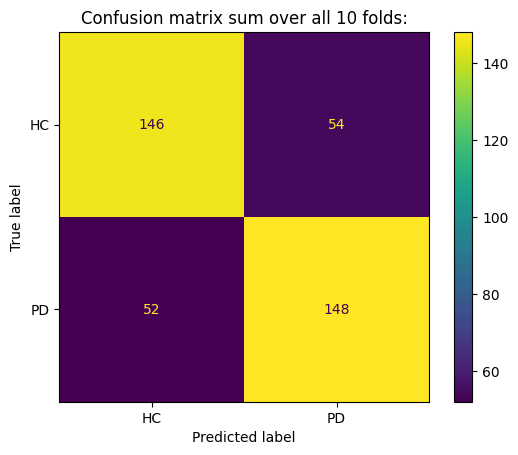

In [4]:

for i in range(len(names)): 
    print("---------------------------------------------------------------")
    print("FEATURE: ", names[i])
    features_to_run = {}
    features_to_run["HC"] = features["HC"].copy()
    features_to_run["PD"] = features["PD"].copy()

    if features_to_plot_names:
        features_to_run["HC"] = features["HC"].loc[:, features_to_plot_names[i] + metadata_columns]
        features_to_run["PD"] = features["PD"].loc[:, features_to_plot_names[i] + metadata_columns]
        print("Features we are using: ")
        print(features_to_plot_names[i])
        
    values = []
    labels = []
    metadata = [] 

    for label, value in features_to_run.items():
        metadata.extend(np.array(value[metadata_columns])) 
        value = np.array(value.drop(columns = metadata_columns))
        values.extend(value)  
        num_label = class_labels[label]
        labels.extend([num_label] * len(value)) 

    num_features = len(values[0])
    values = np.array(values).reshape(-1, num_features) 
    labels = np.array(labels) 
    metadata = np.array(metadata) 

    values = np.nan_to_num(values, nan=0)
    labels = np.nan_to_num(labels, nan=0)
    print("Len of (data, features): ", values.shape)

    train_data, test_data, train_labels, test_labels, train_metadata, test_metadata = train_test_split(values, labels, metadata, test_size=0.4, random_state=seed_number, stratify=labels)

    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)

    print(" ")
    print(" --------------------------------------------  ")
    print("Result from model using the best result from grid searchs")
    print(" ")
    svm_model = SVC(kernel=kernel_best, C=C_best, gamma=gamma_best, random_state=seed_number) # Only use gamma for the rbf kernel 
    svm_model.fit(train_data, train_labels)

    train_predictions = svm_model.predict(train_data)
    accuracy_train = accuracy_score(train_labels, train_predictions)
    print(f"Training Accuracy: {accuracy_train * 100:.2f}%")

    test_predictions = svm_model.predict(test_data)
    accuracy_test = accuracy_score(test_labels, test_predictions)
    print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

    _ = sensitivity_and_specificity(y_true=test_labels, y_pred = test_predictions)

    print(" ")
    print(" --------------------------------------------  ")
    x_fold_cross_val(x=values, y=labels, model=svm_model, num_folds=10, random_state=seed_number, model_type ="SVM", write_out=False)